In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\user\Documents\SAI1\L7\dat.csv',low_memory=False, sep = ';')

In [3]:
#df.head()

In [4]:
#df.info()

In [5]:
column = []
for adr in df['Address 1 (self-reported)']:
    adr = adr[adr.find(" "):len(adr)+1]
    column.append(adr)
    #print(adr)
df["Address 1 (self-reported)"] = column

#print(df['Address 1 (self-reported)'])

In [6]:
df = df.replace({'nan': np.nan})
df = df.replace({' Not found ': np.nan})

for col in list(df.columns):
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in col or 'therms' in col or 'gal' in col or 'Score' in col):
        df[col] = df[col].astype(float)

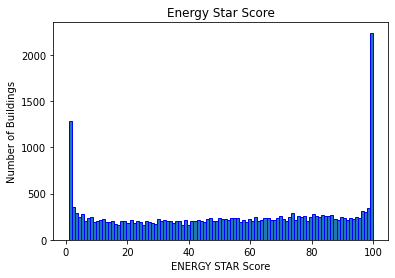

In [7]:
plt.hist(df['ENERGY STAR Score'].dropna(), bins = 100, edgecolor = 'b');
plt.xlabel('ENERGY STAR Score'); 
plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score');

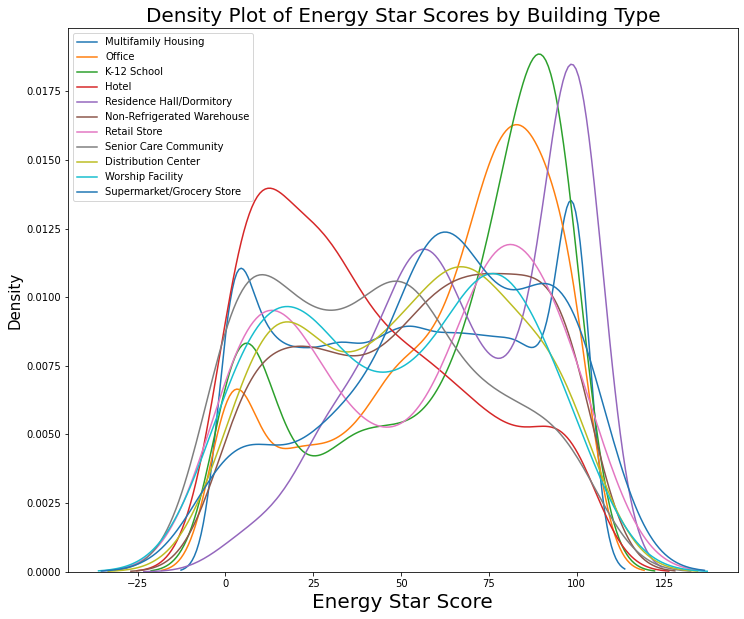

In [8]:
types = df.dropna(subset=['ENERGY STAR Score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)
figsize(12, 10)

for b_type in types:
    subset = df[df['Largest Property Use Type'] == b_type]
    
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(), label = b_type, shade = False, alpha = 0.8);
    
plt.legend(fontsize=10)    
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 15); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 20);

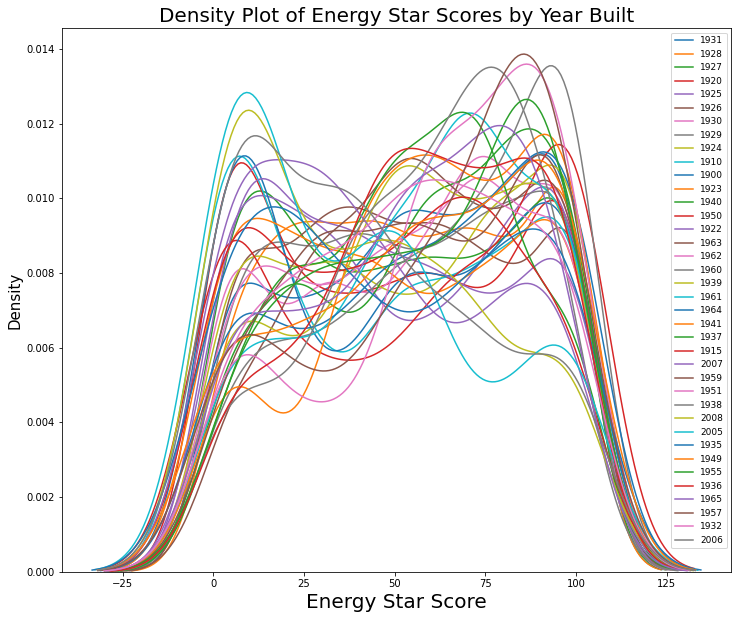

In [9]:
types = df.dropna(subset=['ENERGY STAR Score'])
types = types['Year Built'].value_counts()
types = list(types[types.values > 200].index)
figsize(12, 10)

for b_type in types:
    subset = df[df['Year Built'] == b_type]
    
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(), label = b_type, shade = False, alpha = 0.8);
    
plt.legend(fontsize=9)    
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 15); 
plt.title('Density Plot of Energy Star Scores by Year Built', size = 20);

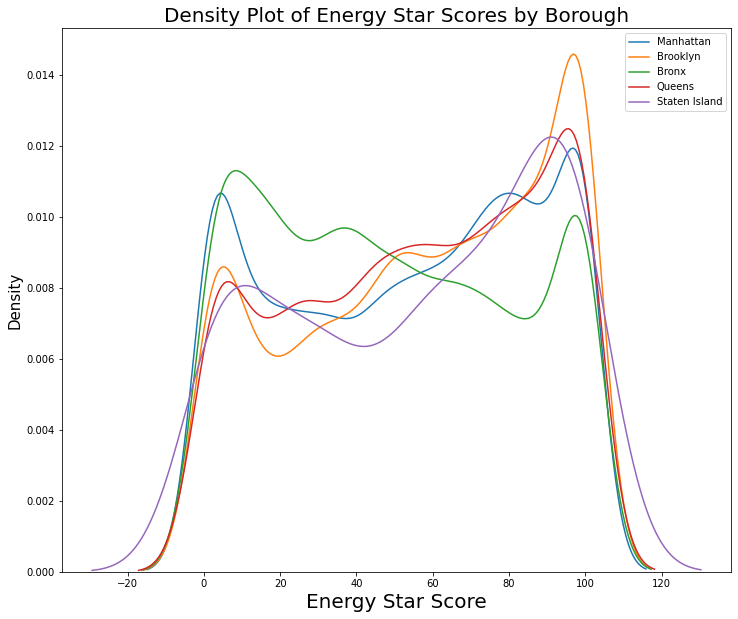

In [10]:
types = df.dropna(subset=['ENERGY STAR Score'])
types = types['Borough'].value_counts()
types = list(types[types.values > 200].index)
figsize(12, 10)

for b_type in types:
    subset = df[df['Borough'] == b_type]
    
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(), label = b_type, shade = False, alpha = 0.8);
    
plt.legend(fontsize=10)    
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 15); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 20);

In [11]:
df['Source EUI (kBtu/ft²)'] = pd.cut(df['Source EUI (kBtu/ft²)'], range(0,450,30))
df['Weather Normalized Source EUI (kBtu/ft²)'] = pd.cut(df['Weather Normalized Source EUI (kBtu/ft²)'], range(0,500,50))
df['Site EUI (kBtu/ft²)'] = pd.cut(df['Site EUI (kBtu/ft²)'], range(0,500,50))

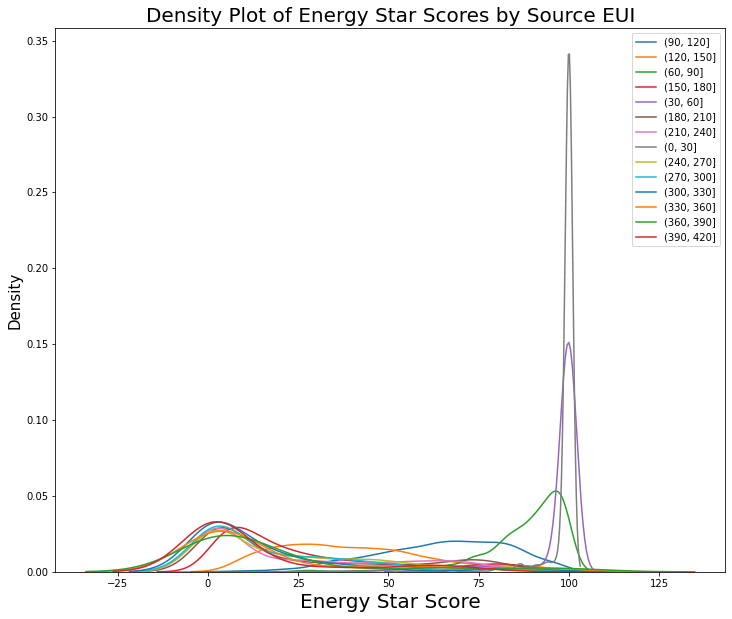

In [12]:
types = df.dropna(subset=['ENERGY STAR Score'])
types = types['Source EUI (kBtu/ft²)'].value_counts()
types = list(types.index)
figsize(12, 10)

for b_type in types:
    subset = df[df['Source EUI (kBtu/ft²)'] == b_type]
    
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(), label = b_type, shade = False, alpha = 0.8);
    
plt.legend(fontsize=10)    
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 15); 
plt.title('Density Plot of Energy Star Scores by Source EUI', size = 20);

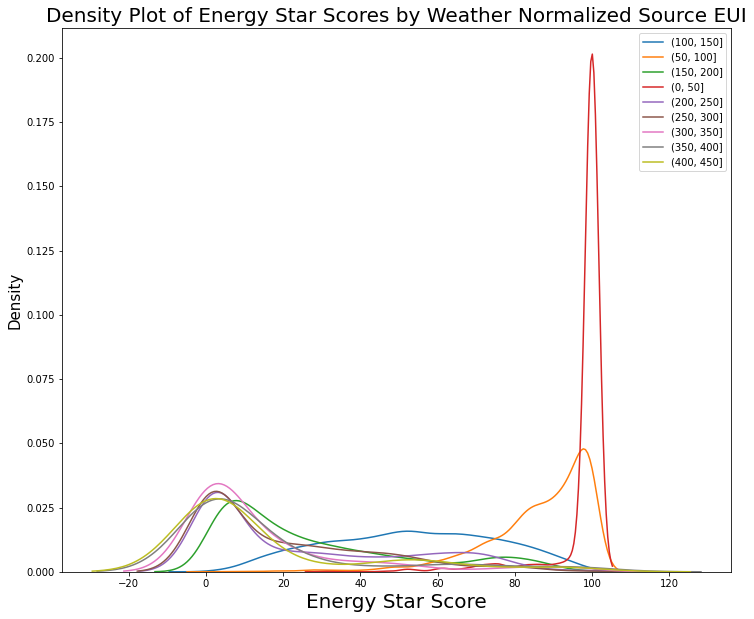

In [13]:
types = df.dropna(subset=['ENERGY STAR Score'])
types = types['Weather Normalized Source EUI (kBtu/ft²)'].value_counts()
types = list(types.index)
figsize(12, 10)

for b_type in types:
    subset = df[df['Weather Normalized Source EUI (kBtu/ft²)'] == b_type]
    
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(), label = b_type, shade = False, alpha = 0.8);
    
plt.legend(fontsize=10)    
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 15); 
plt.title('Density Plot of Energy Star Scores by Weather Normalized Source EUI', size = 20);

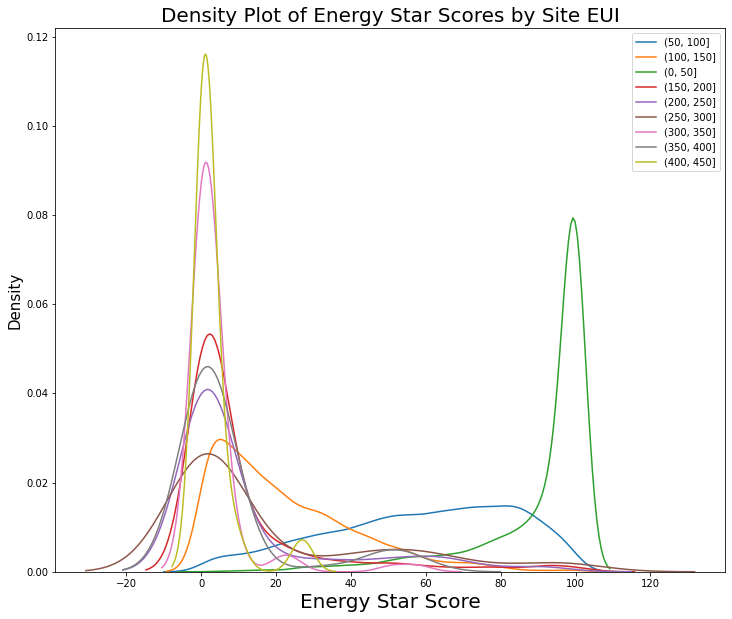

In [14]:
types = df.dropna(subset=['ENERGY STAR Score'])
types = types['Site EUI (kBtu/ft²)'].value_counts()
types = list(types.index)
figsize(12, 10)

for b_type in types:
    subset = df[df['Site EUI (kBtu/ft²)'] == b_type]
    
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(), label = b_type, shade = False, alpha = 0.8);
    
plt.legend(fontsize=10)    
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 15); 
plt.title('Density Plot of Energy Star Scores by Site EUI', size = 20);

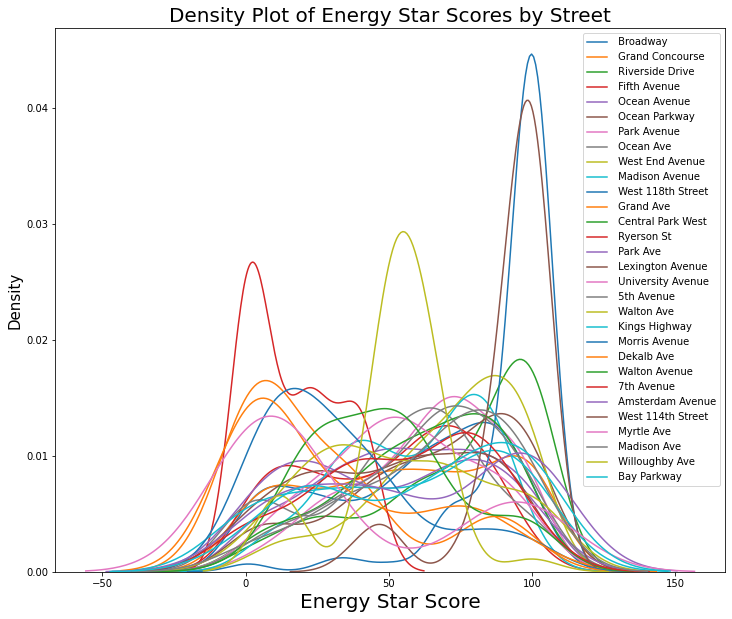

In [15]:
types = df.dropna(subset=['ENERGY STAR Score'])
types = types['Address 1 (self-reported)'].value_counts()
types = list(types[types.values > 40].index)
figsize(12, 10)

for b_type in types:
    subset = df[df['Address 1 (self-reported)'] == b_type]
    
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(), label = b_type, shade = False, alpha = 0.8);
    
plt.legend(fontsize=10)    
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 15); 
plt.title('Density Plot of Energy Star Scores by Street', size = 20);

In [16]:
print(df.corr()['ENERGY STAR Score'].sort_values().dropna())

District Hot Water Use (kBtu)                                -0.911086
District Chilled Water Use (kBtu)                            -0.640742
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.296841
Diesel #2 Use (kBtu)                                         -0.137280
Property Id                                                  -0.129810
Fuel Oil #5 & 6 Use (kBtu)                                   -0.117879
Fuel Oil #2 Use (kBtu)                                       -0.116547
Fuel Oil #4 Use (kBtu)                                       -0.114057
Order                                                        -0.091814
Fuel Oil #1 Use (kBtu)                                       -0.055582
Occupancy                                                    -0.050450
District Steam Use (kBtu)                                    -0.046218
Electricity Use - Grid Purchase (kWh)                        -0.045079
Electricity Use - Grid Purchase (kBtu)                       -0.045079
Weathe

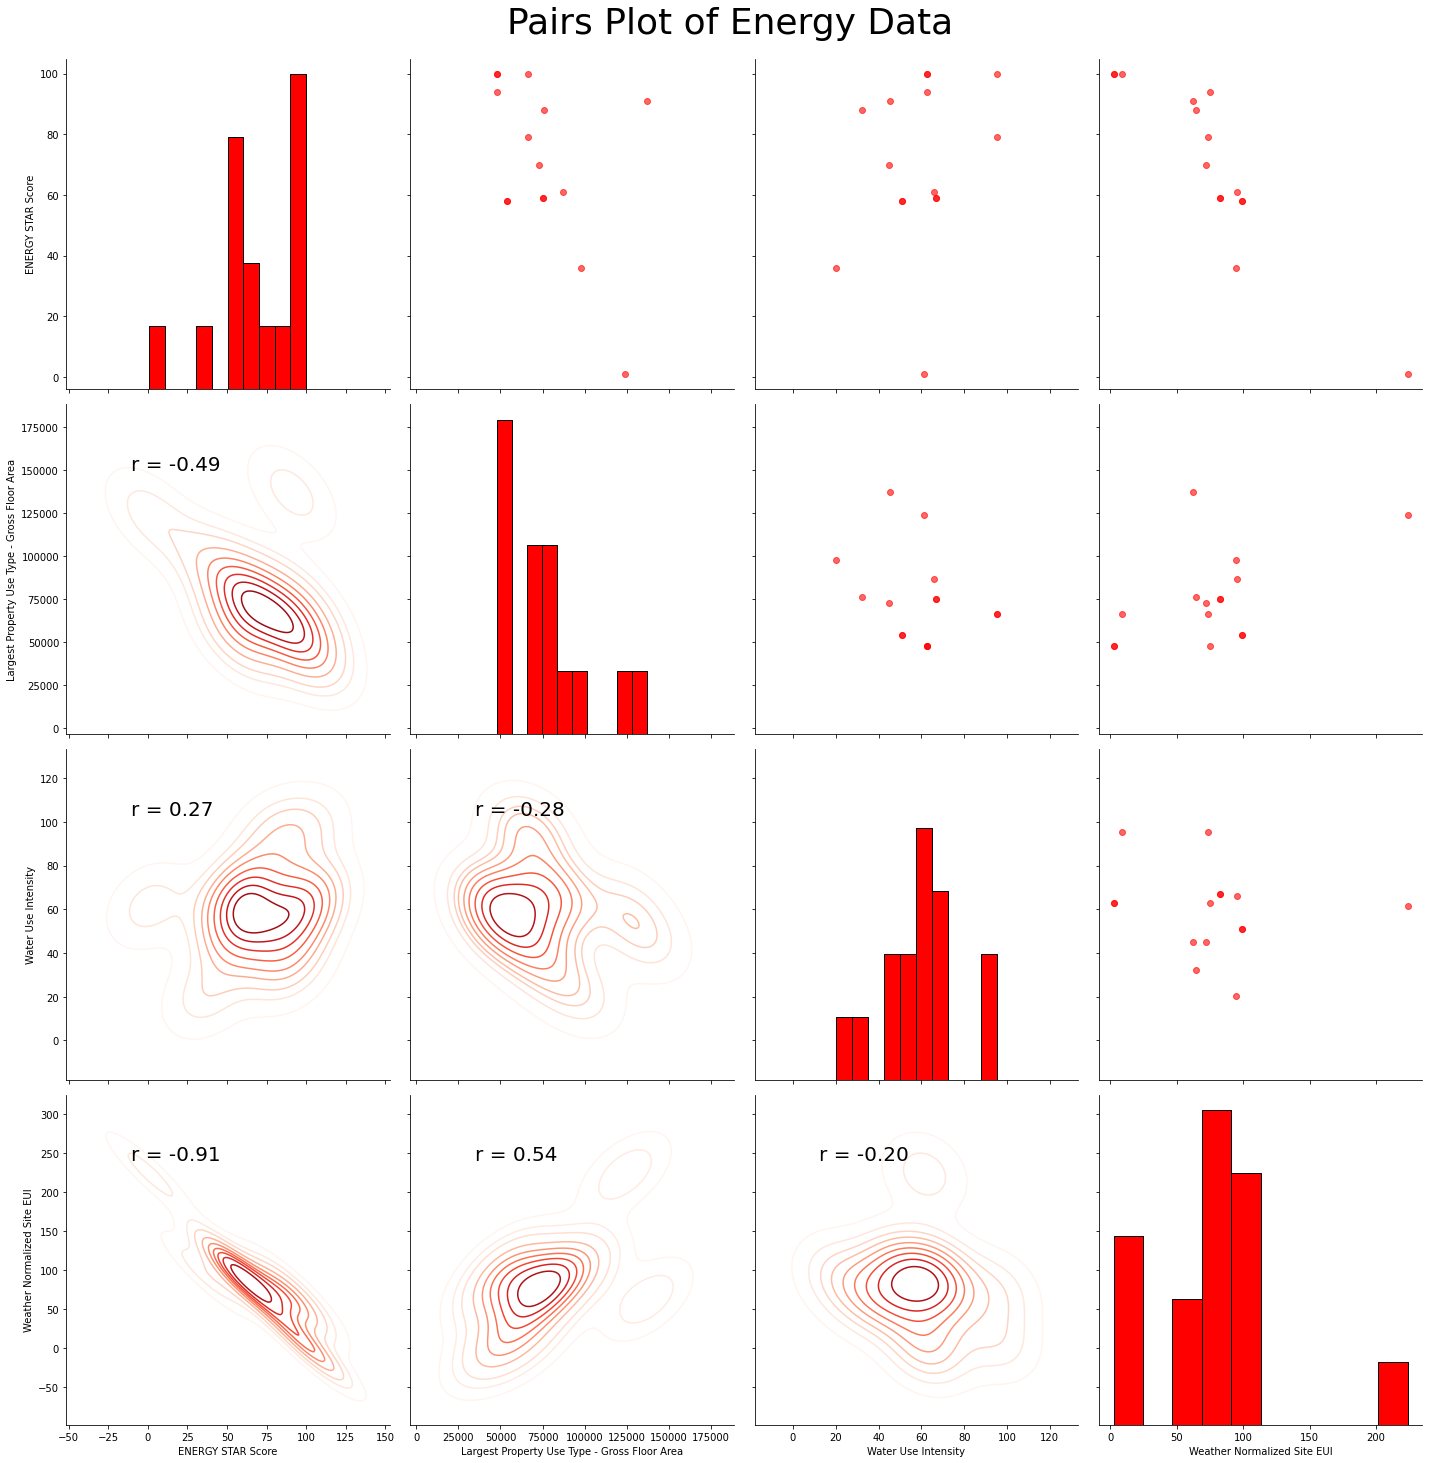

In [48]:
plot_data = subset[['ENERGY STAR Score', 'Largest Property Use Type - Gross Floor Area (ft²)', 
                      'Water Use Intensity (All Water Sources) (gal/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)']]

plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

plot_data = plot_data.rename(columns = {'Largest Property Use Type - Gross Floor Area (ft²)': 'Largest Property Use Type - Gross Floor Area', 
                                       'Water Use Intensity (All Water Sources) (gal/ft²)': 'Water Use Intensity',
                                       'Weather Normalized Site EUI (kBtu/ft²)': 'Weather Normalized Site EUI'})

plot_data = plot_data.dropna()

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

grid = sns.PairGrid(data = plot_data, height = 5)

grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

In [60]:
features  = features.dropna(axis=1, how = 'all')
print(features.shape)

(34355, 146)
